#DevTown Task

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, LabelEncoder,
                                   OneHotEncoder)
from sklearn.feature_selection import SelectKBest, chi2

##LOAD DATASET

In [61]:
titanic_df = sns.load_dataset('titanic')
#df = pd.read_csv('your_dataset.csv')

##Exploratory data analysis (EDA)

In [62]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [63]:
titanic_df.shape

(891, 15)

In [64]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
titanic_df.describe(include=['object'])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


###Visulizaiton

####Pairwise relationship plot:

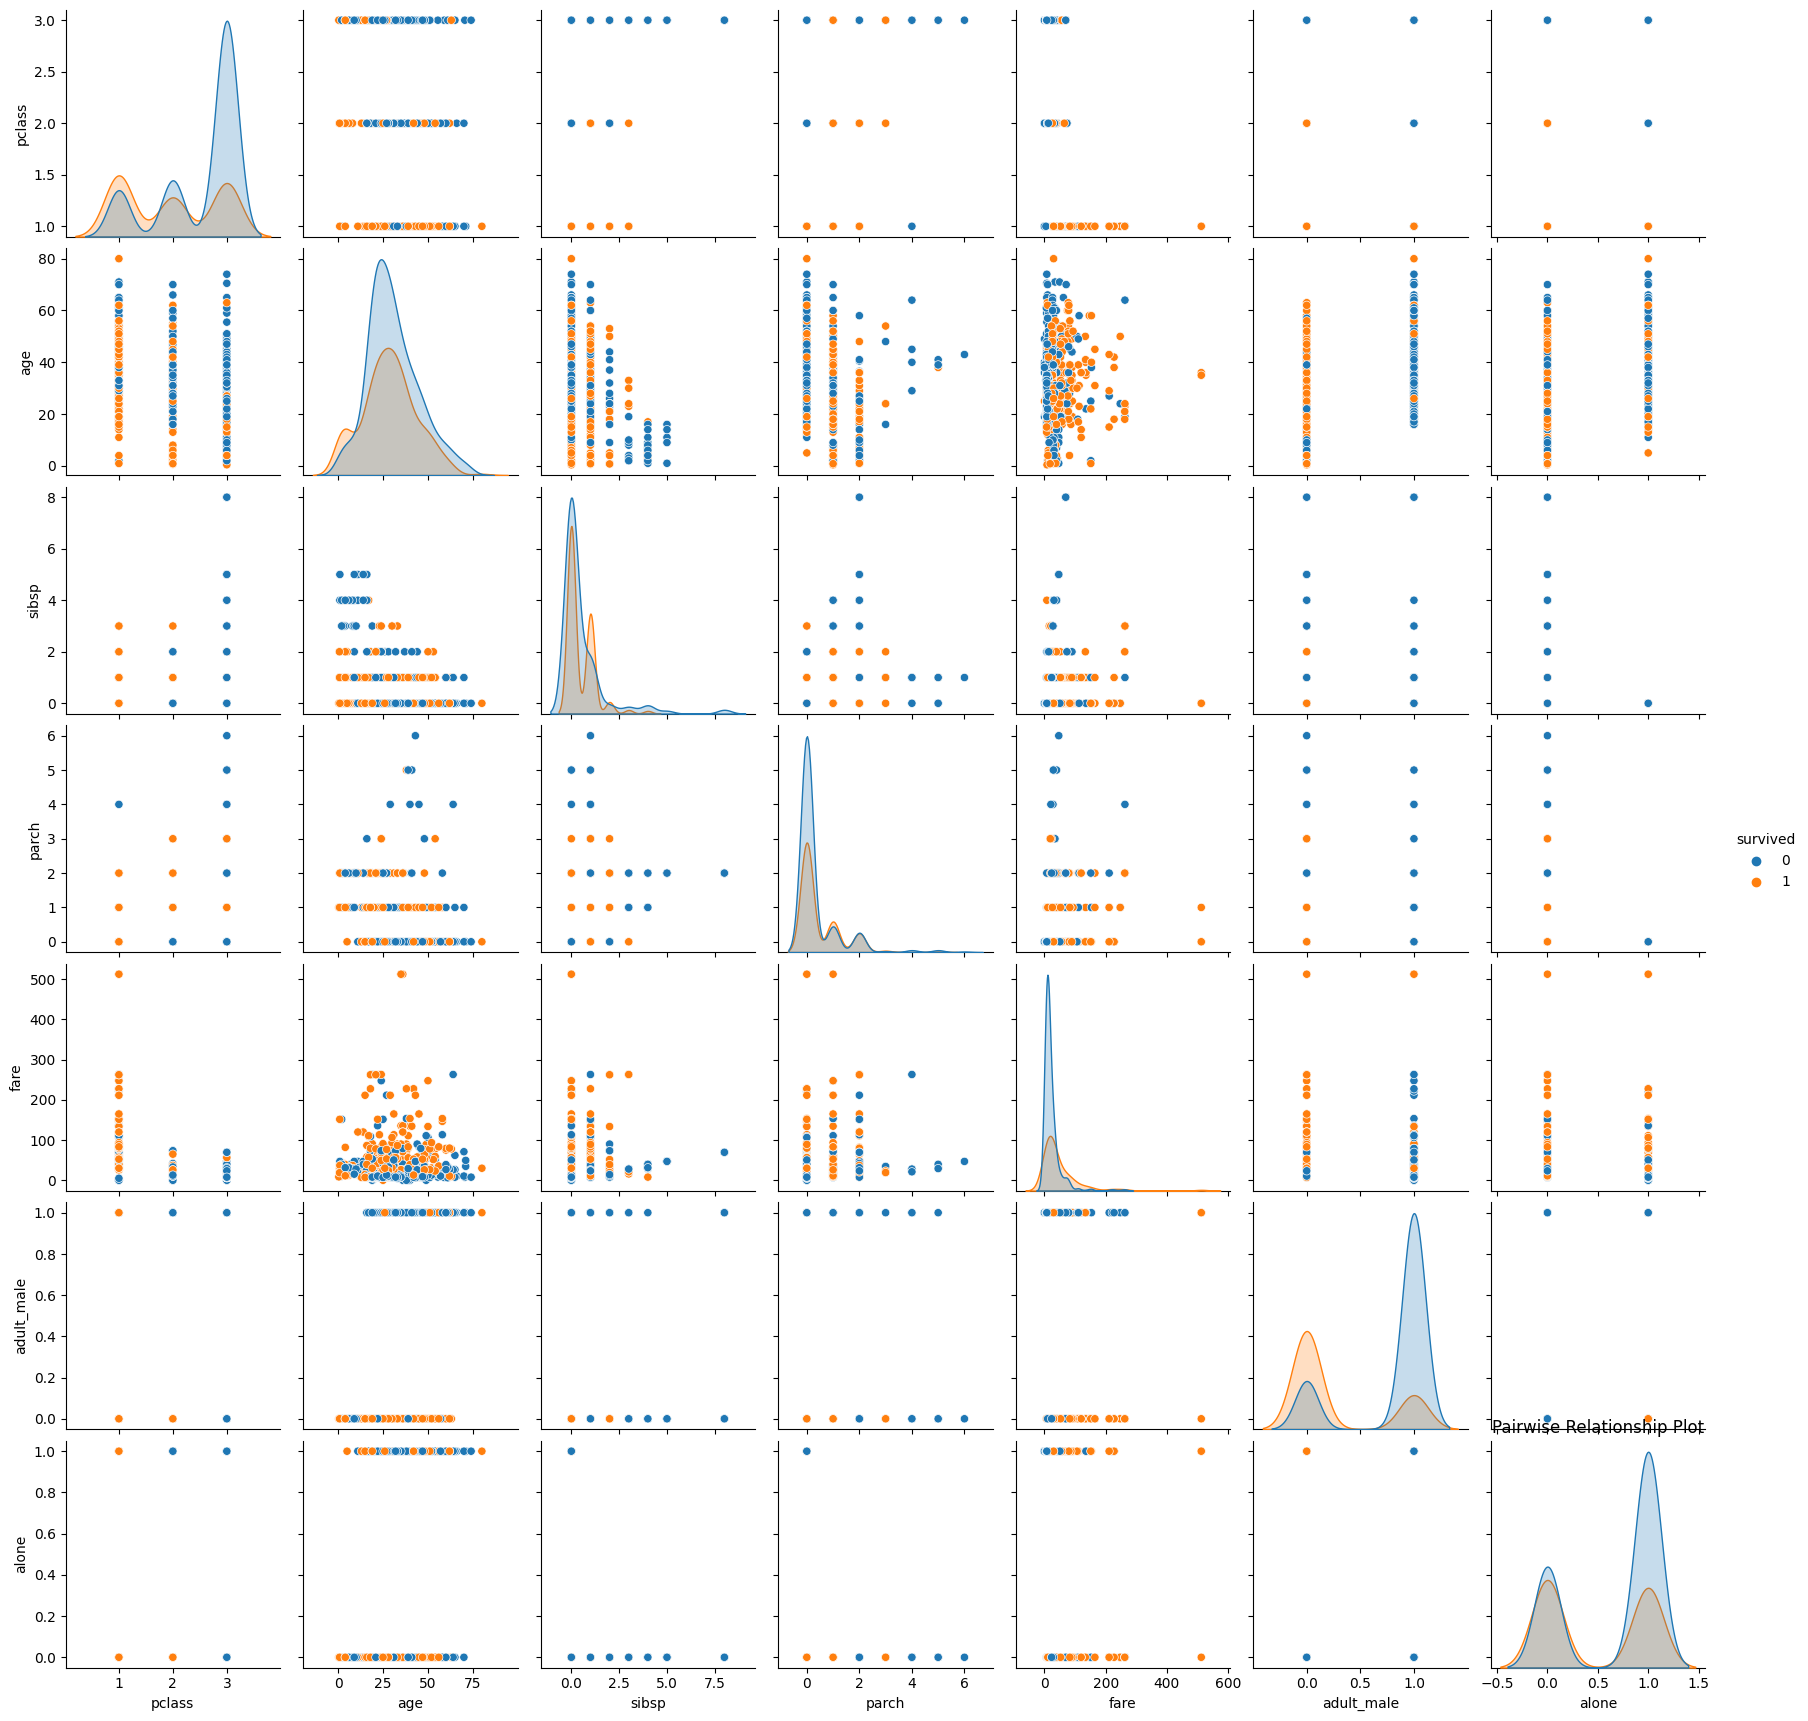

In [66]:
sns.pairplot(titanic_df, hue='survived')
plt.title('Pairwise Relationship Plot')
plt.show()

####Distribution plot:

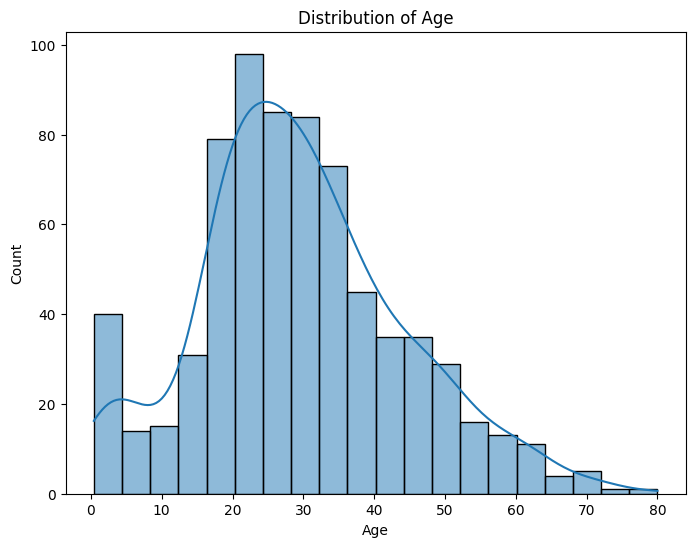

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['age'].dropna(), bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


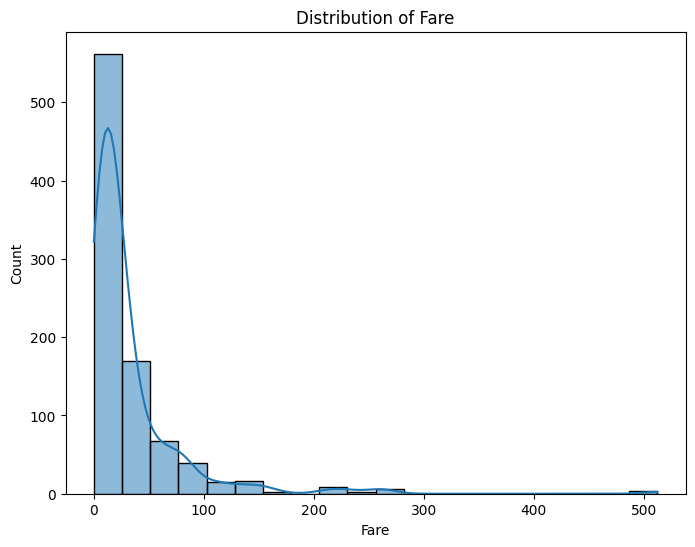

In [68]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['fare'].dropna(), bins=20, kde=True)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare')
plt.show()

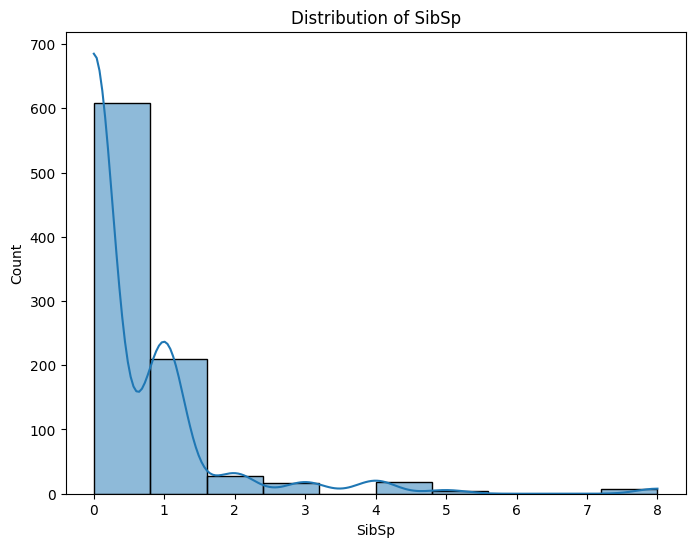

In [69]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['sibsp'].dropna(), bins=10, kde=True)
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Distribution of SibSp')
plt.show()

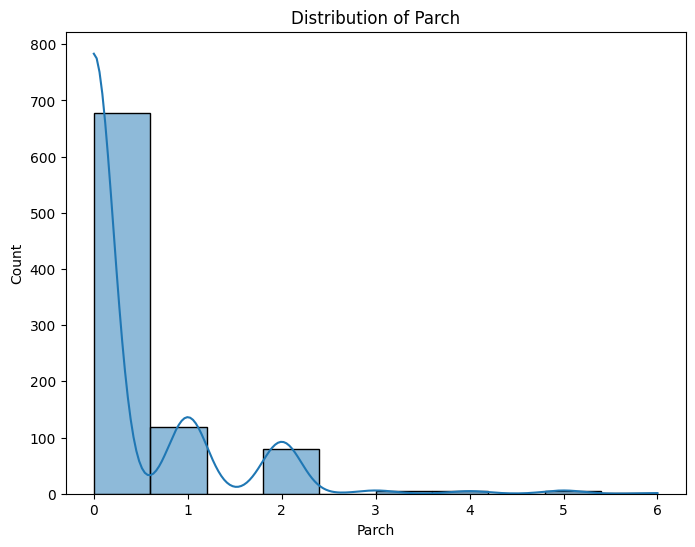

In [70]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['parch'].dropna(), bins=10, kde=True)
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Distribution of Parch')
plt.show()


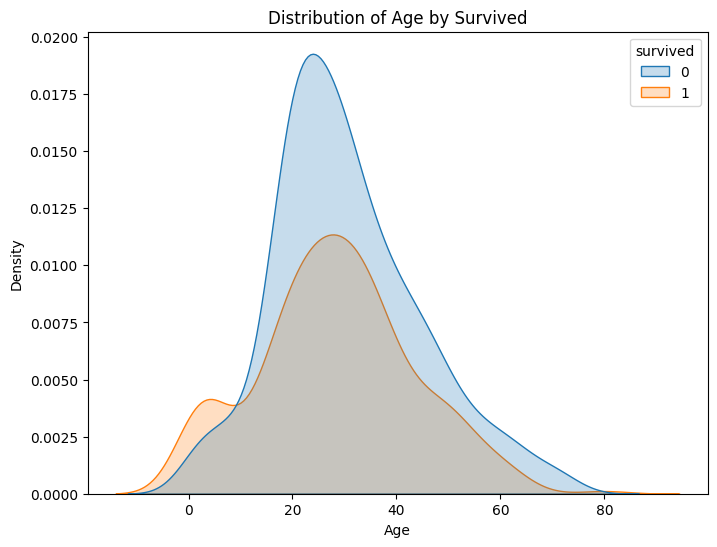

In [71]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=titanic_df, x="age", hue="survived", fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age by Survived')
plt.show()


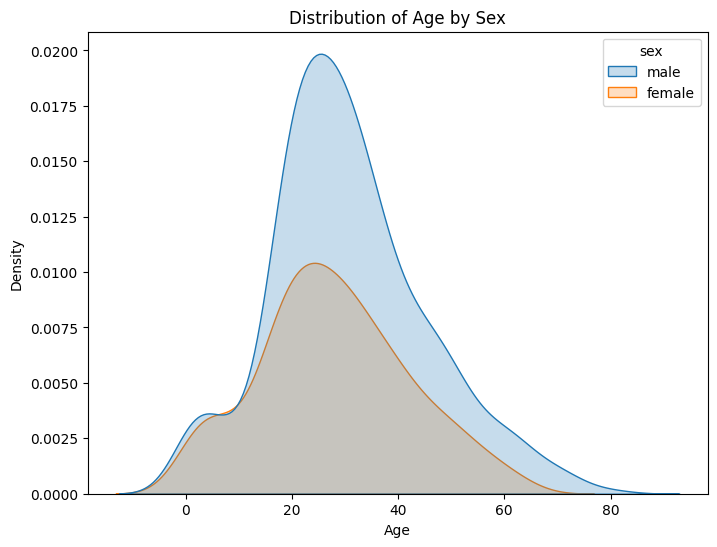

In [72]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=titanic_df, x="age", hue="sex", fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age by Sex')
plt.show()

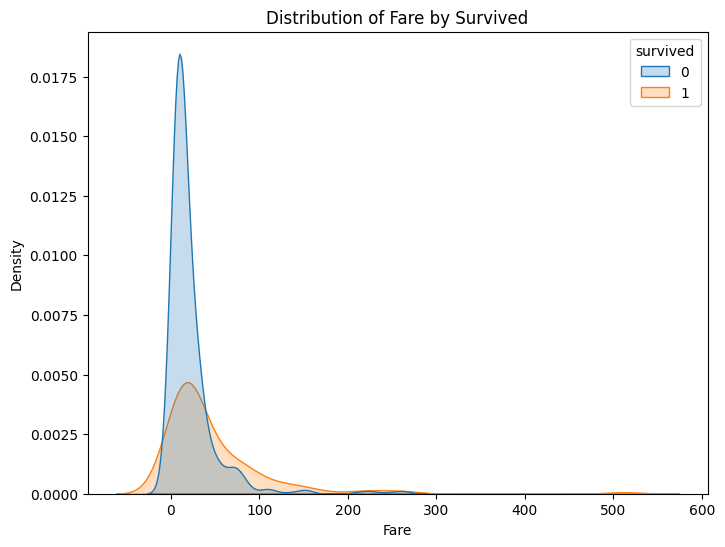

In [73]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=titanic_df, x="fare", hue="survived", fill=True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Distribution of Fare by Survived')
plt.show()

####Boxplot

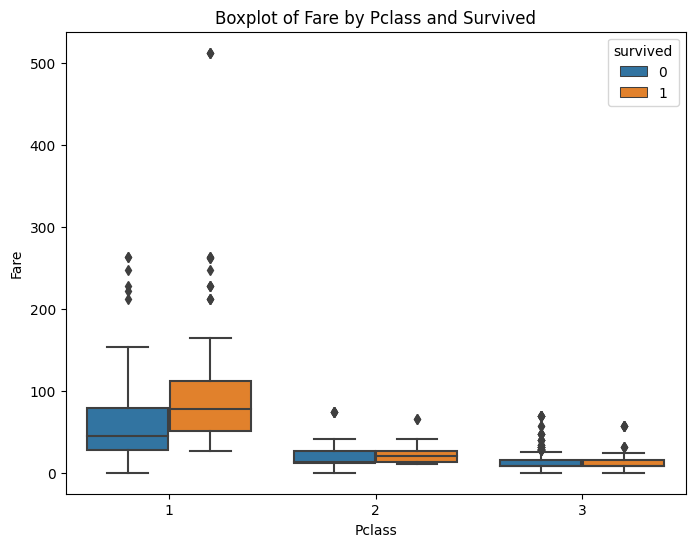

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='fare', hue='survived', data=titanic_df)
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Boxplot of Fare by Pclass and Survived')
plt.show()

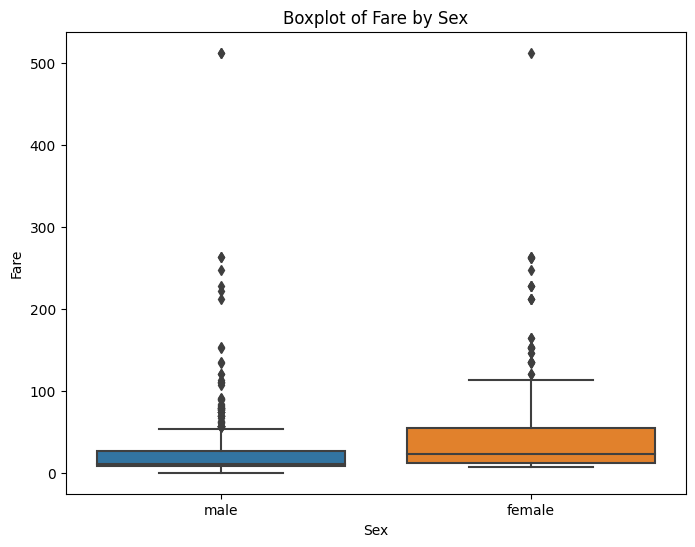

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='fare', data=titanic_df)
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.title('Boxplot of Fare by Sex')
plt.show()

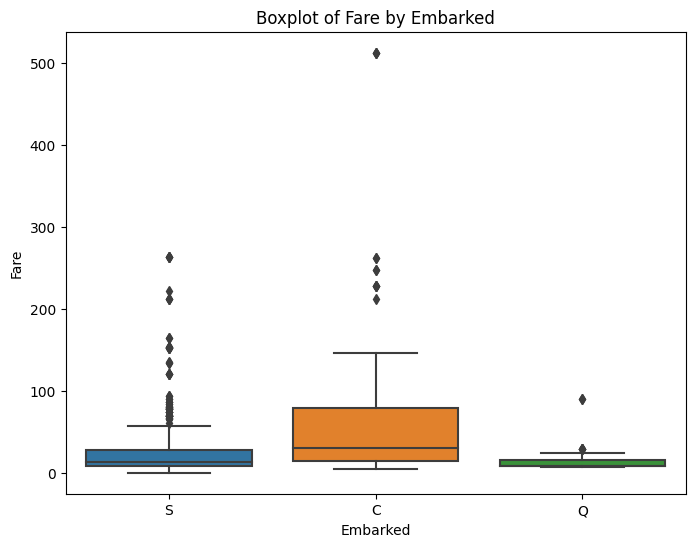

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='embarked', y='fare', data=titanic_df)
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.title('Boxplot of Fare by Embarked')
plt.show()

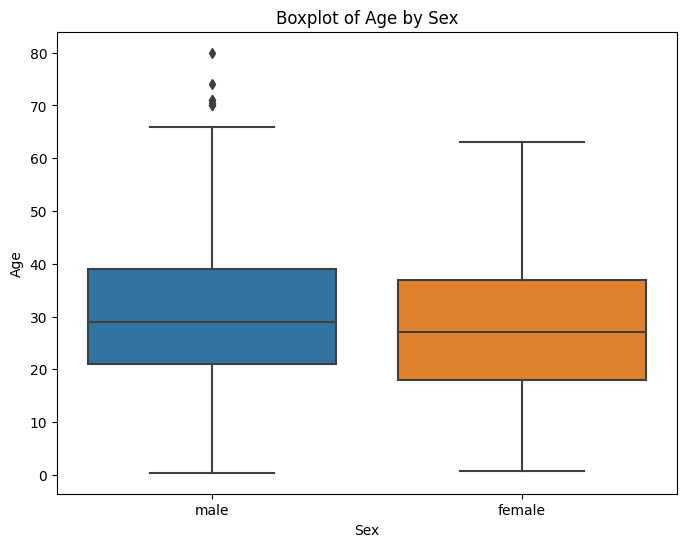

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=titanic_df)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Boxplot of Age by Sex')
plt.show()

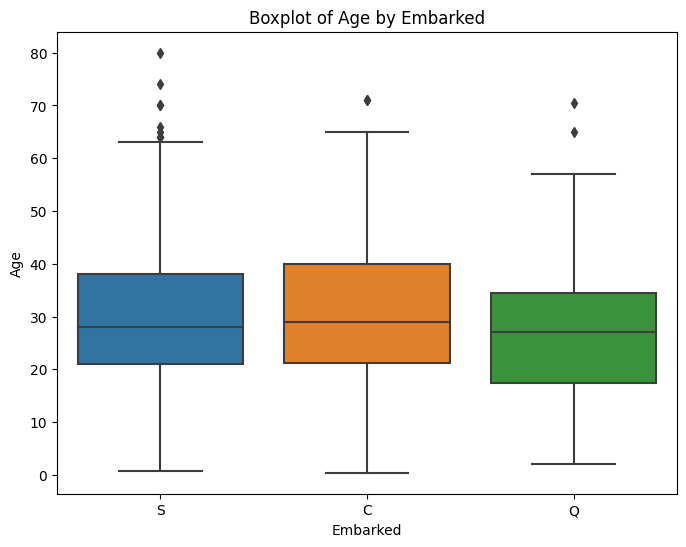

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='embarked', y='age', data=titanic_df)
plt.xlabel('Embarked')
plt.ylabel('Age')
plt.title('Boxplot of Age by Embarked')
plt.show()

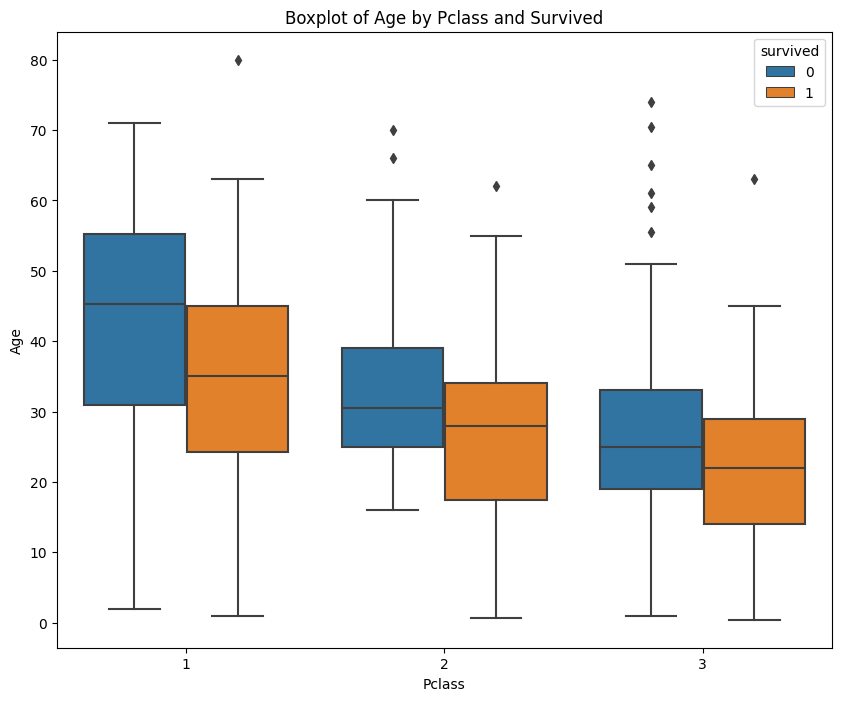

In [79]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='pclass', y='age', hue='survived', data=titanic_df)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Boxplot of Age by Pclass and Survived')
plt.show()

####Bar Plot

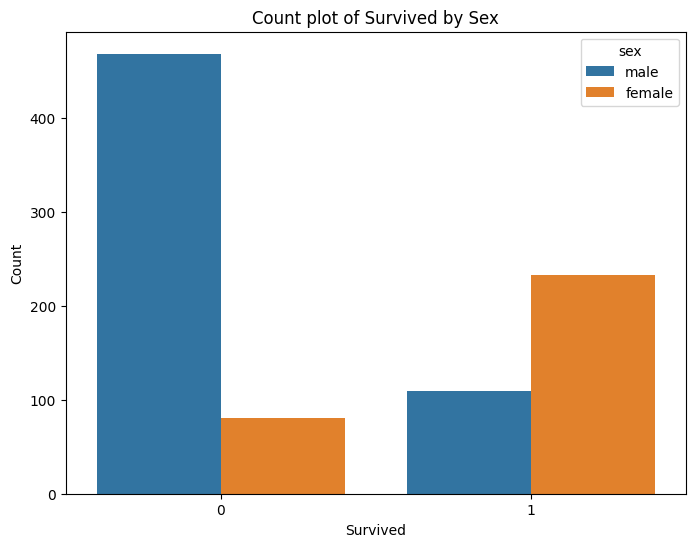

In [80]:
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', hue='sex', data=titanic_df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count plot of Survived by Sex')
plt.show()

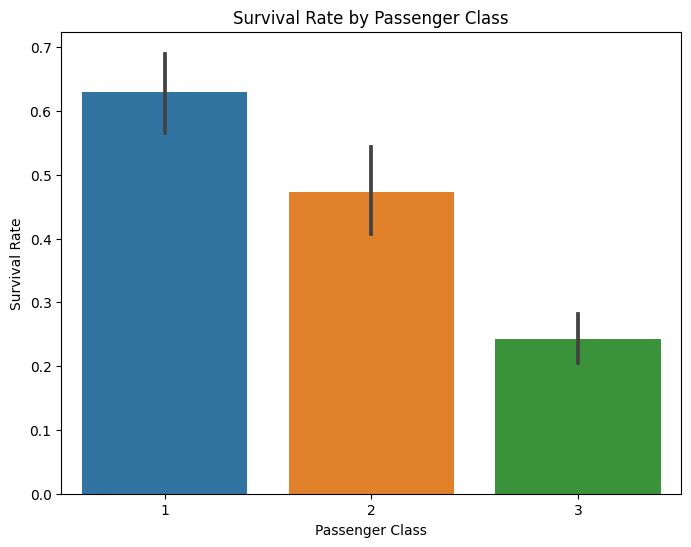

In [81]:
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=titanic_df)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

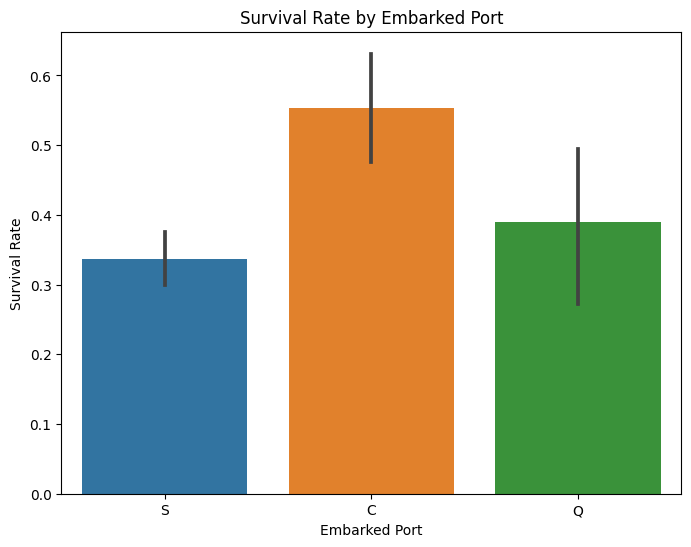

In [82]:
plt.figure(figsize=(8, 6))
sns.barplot(x='embarked', y='survived', data=titanic_df)
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Embarked Port')
plt.show()

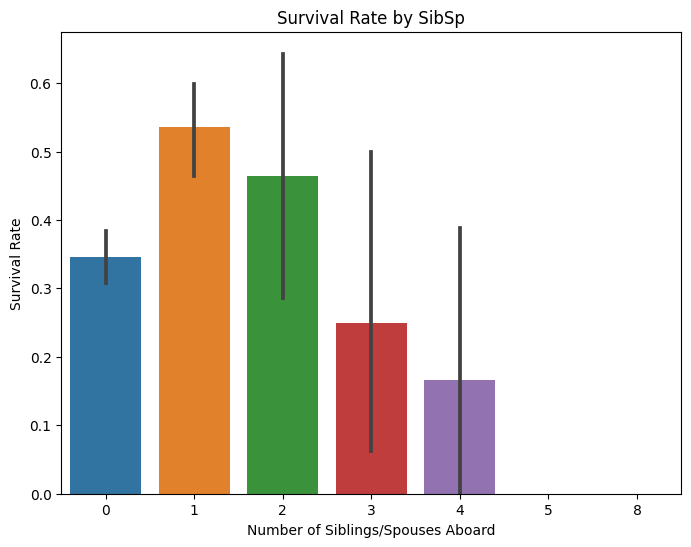

In [83]:
plt.figure(figsize=(8, 6))
sns.barplot(x='sibsp', y='survived', data=titanic_df)
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by SibSp')
plt.show()

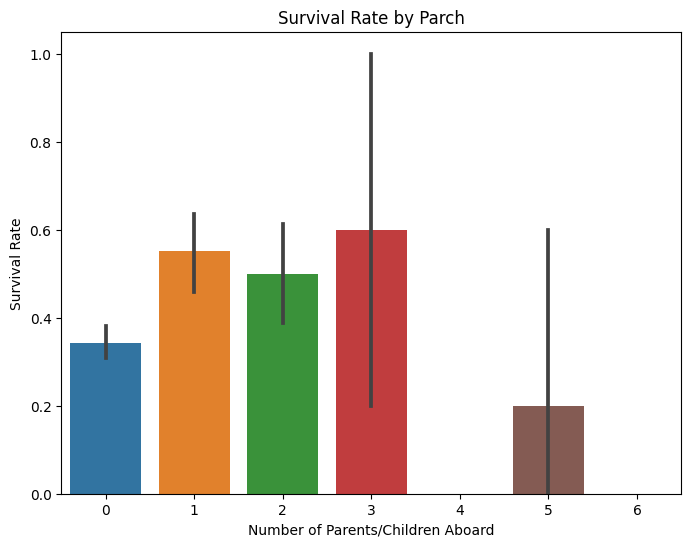

In [84]:
plt.figure(figsize=(8, 6))
sns.barplot(x='parch', y='survived', data=titanic_df)
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Parch')
plt.show()

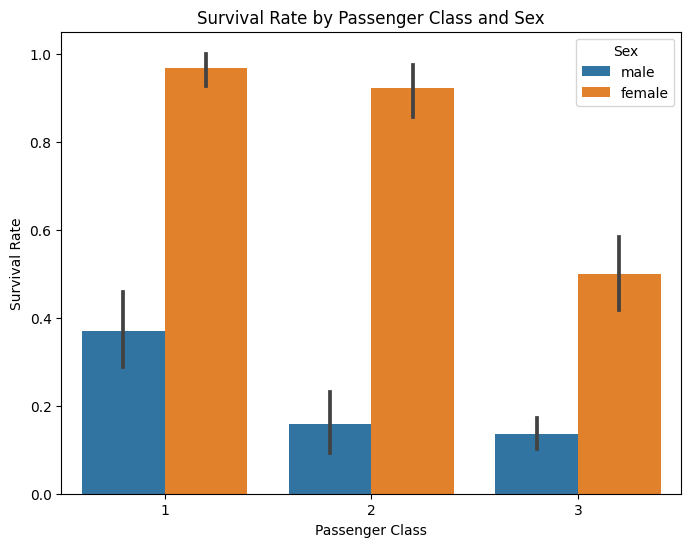

In [85]:
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic_df)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class and Sex')
plt.legend(title='Sex')
plt.show()

####Correlation Matrix

<ipython-input-86-86e85fc7017d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic_df.corr()


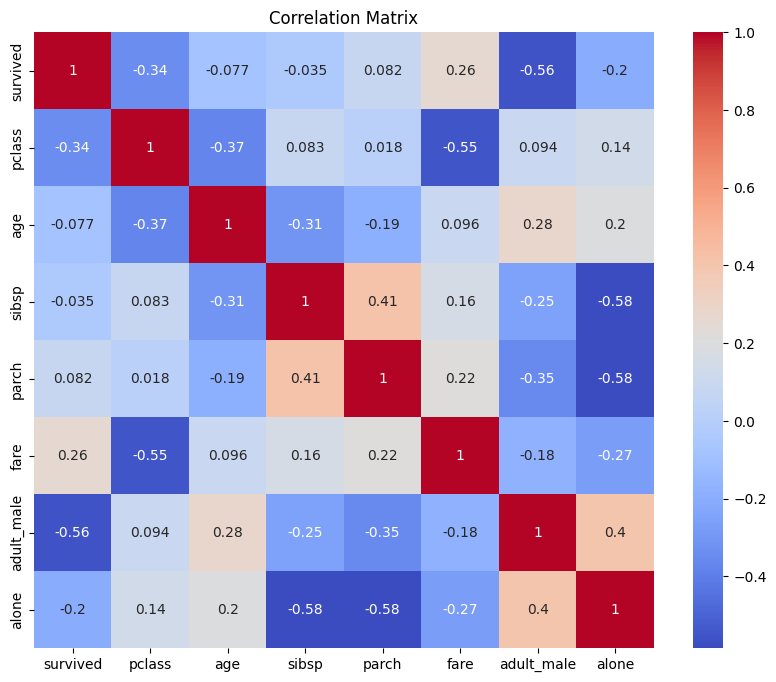

In [86]:
plt.figure(figsize=(10, 8))
corr_matrix = titanic_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-87-55e512464c48>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic_df.corr()


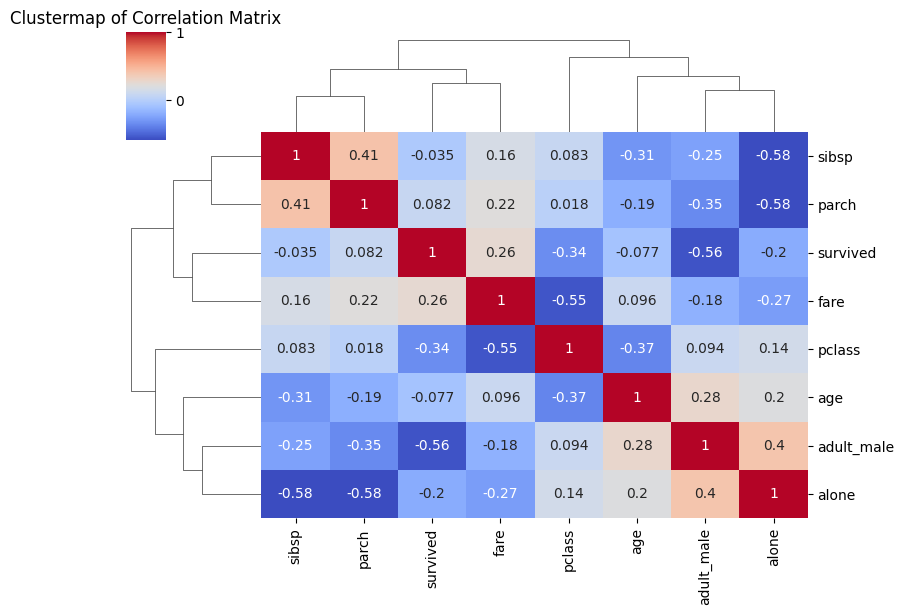

In [87]:
# Clustermap of correlation matrix
corr_matrix = titanic_df.corr()
sns.clustermap(corr_matrix, cmap='coolwarm', annot=True, figsize=(8, 6))
plt.title('Clustermap of Correlation Matrix')
plt.show()


plt.show()

####Violin

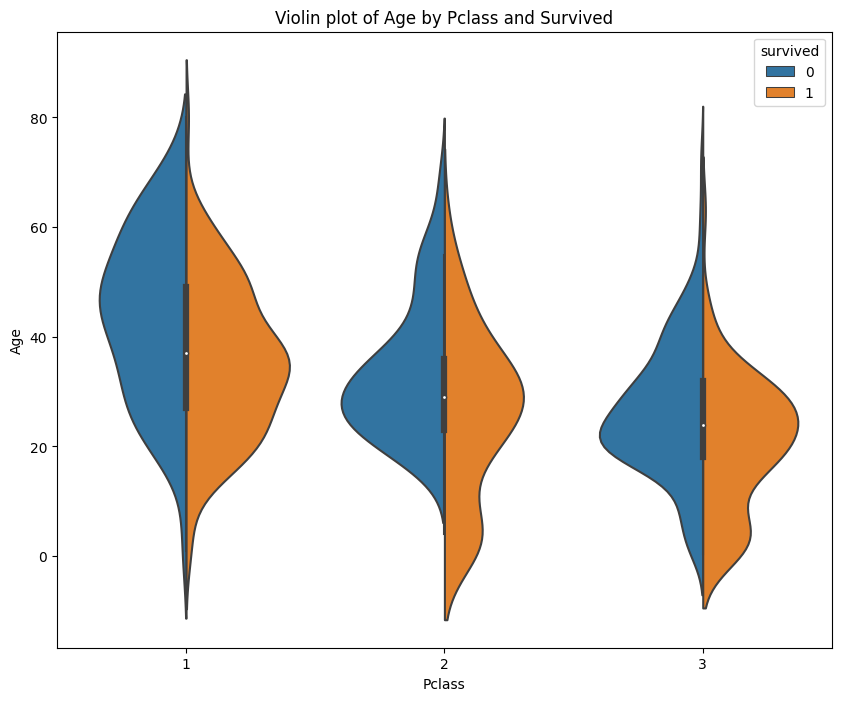

In [88]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='pclass', y='age', hue='survived', data=titanic_df, split=True)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Violin plot of Age by Pclass and Survived')
plt.show()

####Swarm Plot

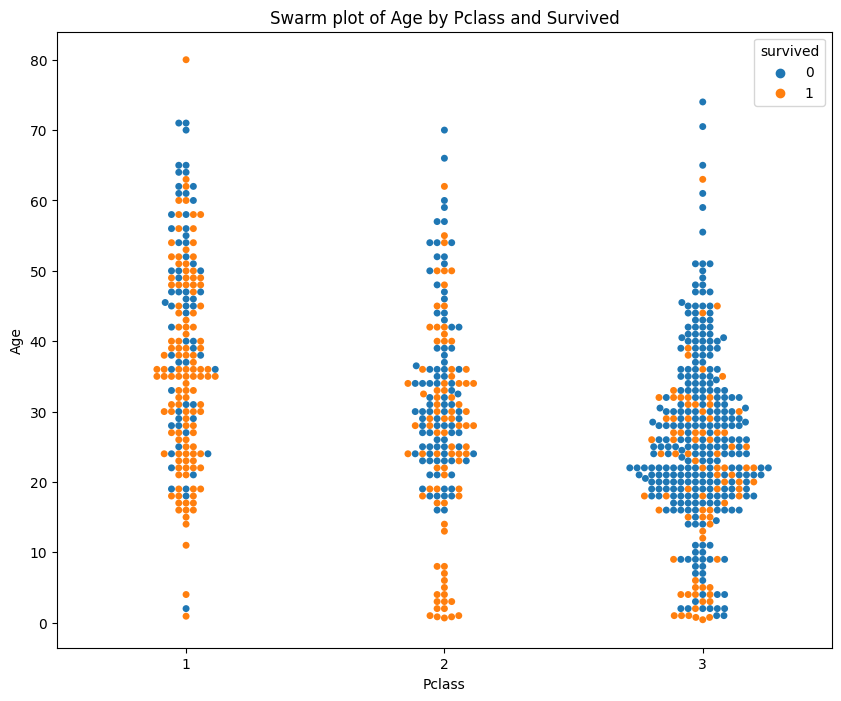

In [89]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x='pclass', y='age', hue='survived', data=titanic_df)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Swarm plot of Age by Pclass and Survived')
plt.show()

####Pie Chart

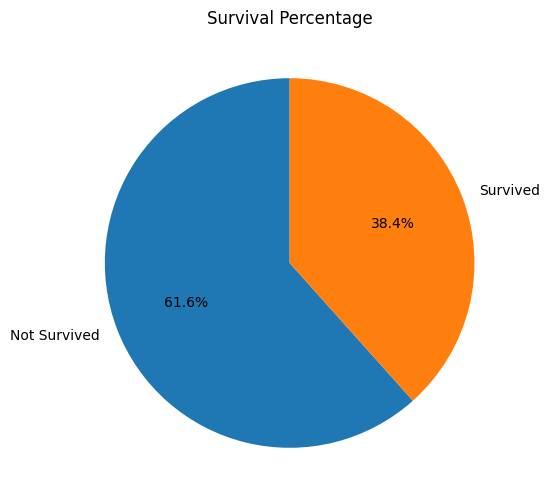

In [90]:
plt.figure(figsize=(8, 6))
survived_count = titanic_df['survived'].value_counts()
plt.pie(survived_count, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Percentage')
plt.show()


####Point Plot

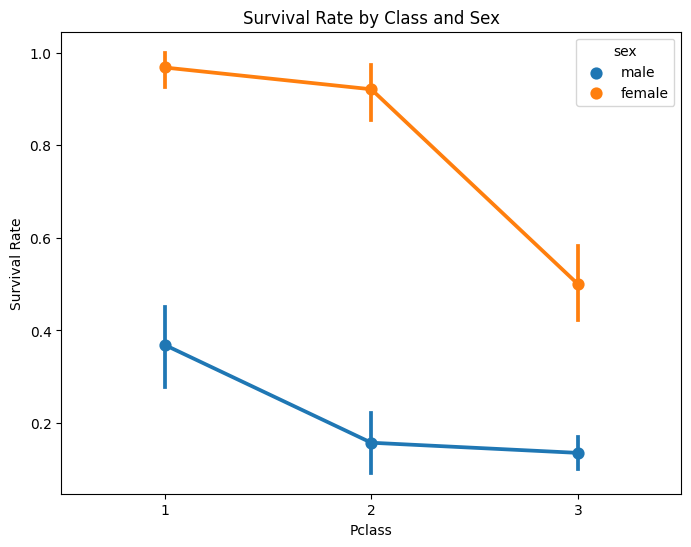

In [91]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='pclass', y='survived', hue='sex', data=titanic_df)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class and Sex')
plt.show()

####Scatter Plot

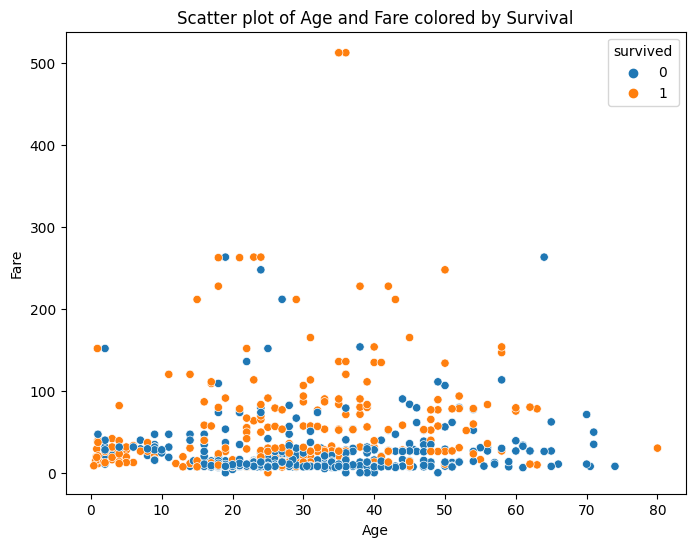

In [92]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic_df)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter plot of Age and Fare colored by Survival')
plt.show()

####Stacked bar plot

<Figure size 800x600 with 0 Axes>

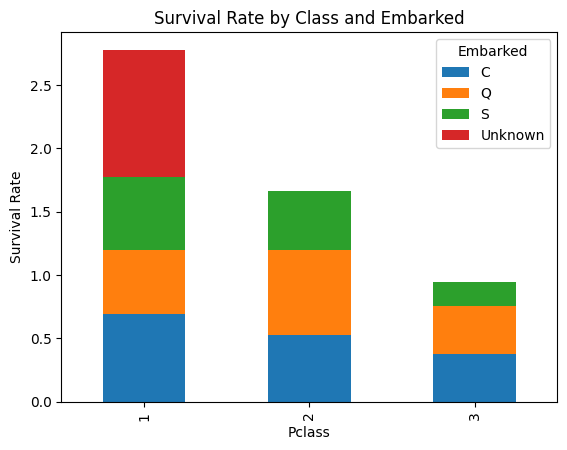

In [93]:
plt.figure(figsize=(8, 6))
titanic_df['embarked'] = titanic_df['embarked'].fillna('Unknown')
survived_by_class_embarked = titanic_df.groupby(['pclass', 'embarked'])['survived'].mean().unstack()
survived_by_class_embarked.plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class and Embarked')
plt.legend(title='Embarked', loc='best')
plt.show()


####Line plot

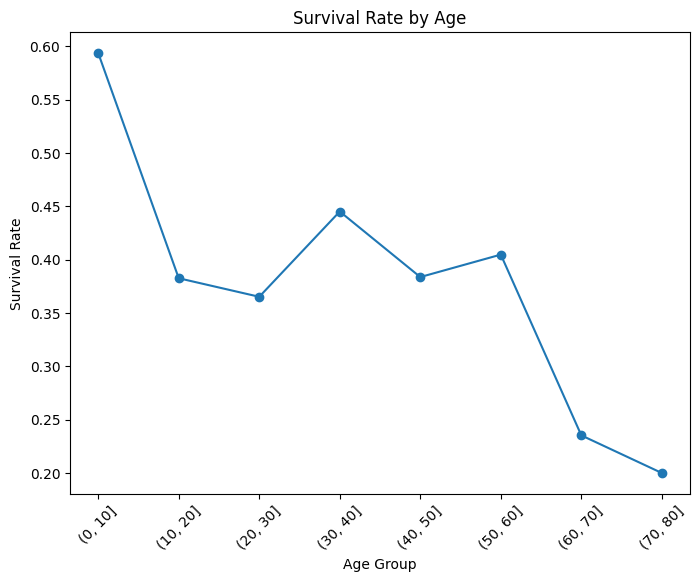

In [94]:
plt.figure(figsize=(8, 6))
titanic_df['age_group'] = pd.cut(titanic_df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
survival_rate_by_age = titanic_df.groupby('age_group')['survived'].mean()
survival_rate_by_age.index = survival_rate_by_age.index.astype(str)  # Convert age_group to string
plt.plot(survival_rate_by_age.index, survival_rate_by_age.values, marker='o')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age')
plt.xticks(rotation=45)
plt.show()

####Hexbin Plot

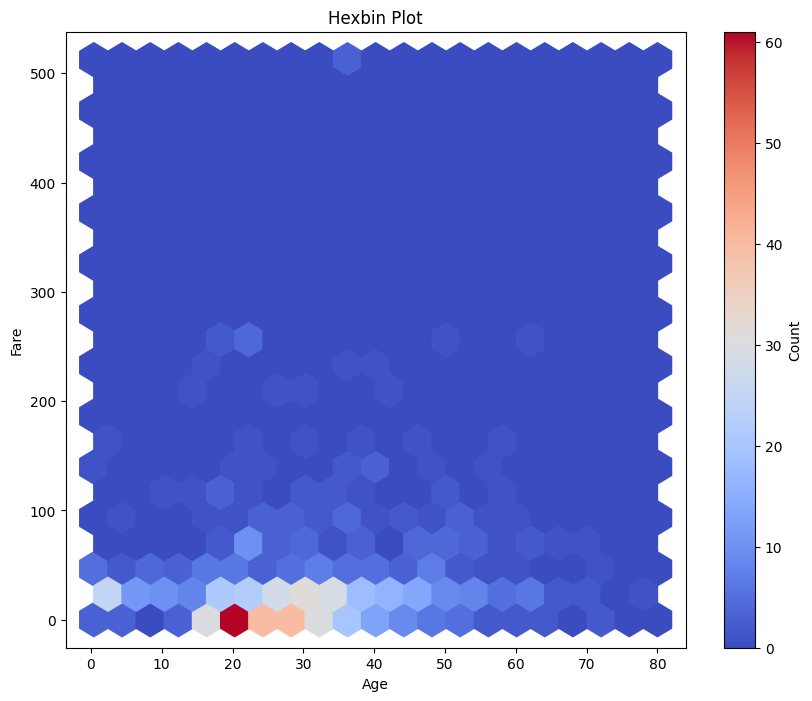

In [95]:
plt.figure(figsize=(10, 8))
plt.hexbin(titanic_df['age'], titanic_df['fare'], gridsize=20, cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Hexbin Plot')
plt.colorbar(label='Count')
plt.show()



####FacetGrid

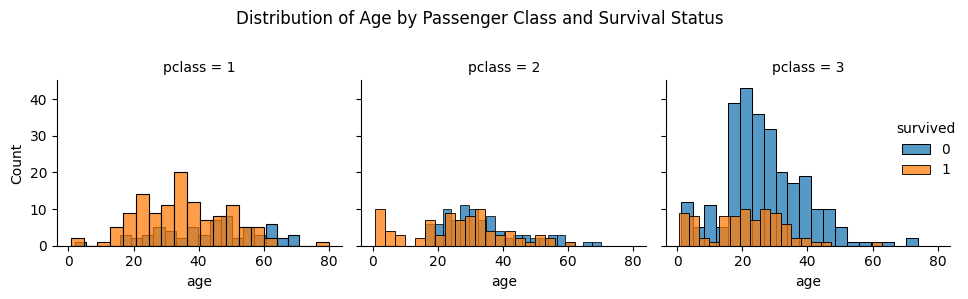

In [96]:
g = sns.FacetGrid(titanic_df, col='pclass', hue='survived')
g.map(sns.histplot, 'age', bins=20)
g.add_legend()
plt.suptitle('Distribution of Age by Passenger Class and Survival Status')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


####Joint distribution with regression

<Figure size 800x600 with 0 Axes>

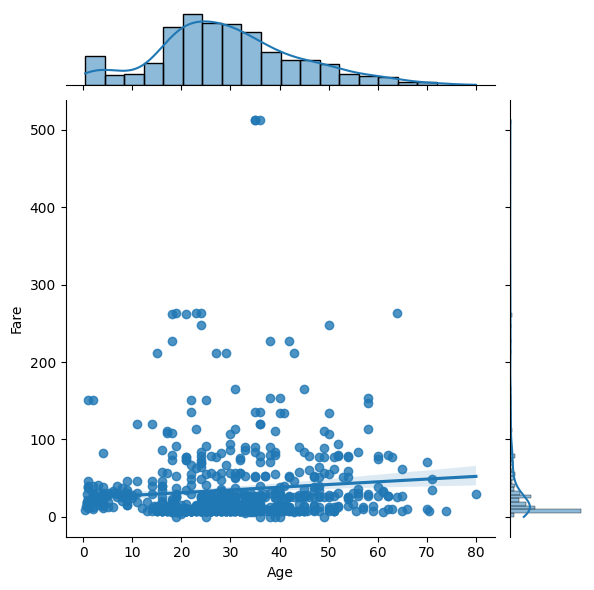

In [97]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='age', y='fare', data=titanic_df, kind='reg')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

####Boxen

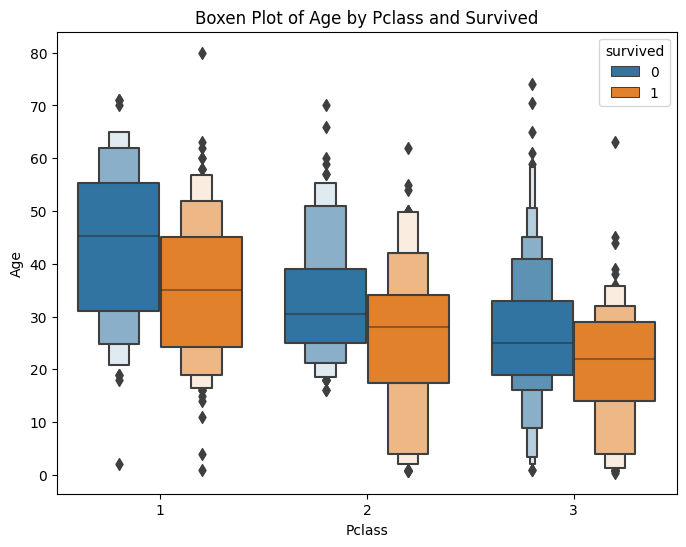

In [98]:
plt.figure(figsize=(8, 6))
sns.boxenplot(data=titanic_df, x='pclass', y='age', hue='survived')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Boxen Plot of Age by Pclass and Survived')
plt.show()


####Rug Plot

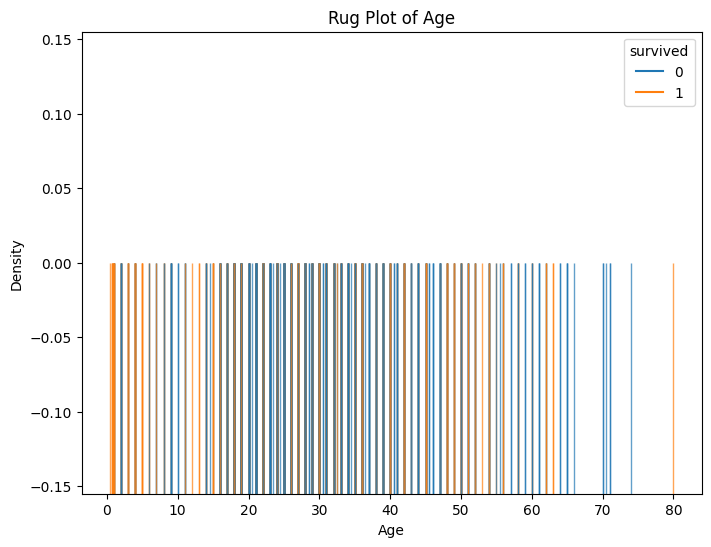

In [99]:
plt.figure(figsize=(8, 6))
sns.rugplot(data=titanic_df, x='age', height=0.5, hue='survived', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Rug Plot of Age')
plt.show()


####Histogram with Cumulative Distribution Function

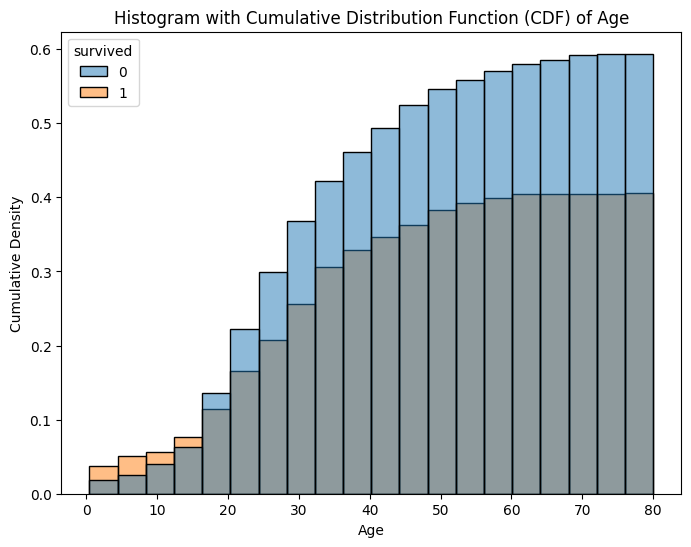

In [100]:
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_df, x='age', hue='survived', cumulative=True, stat='density')
plt.xlabel('Age')
plt.ylabel('Cumulative Density')
plt.title('Histogram with Cumulative Distribution Function (CDF) of Age')
plt.show()

####Radial Chart

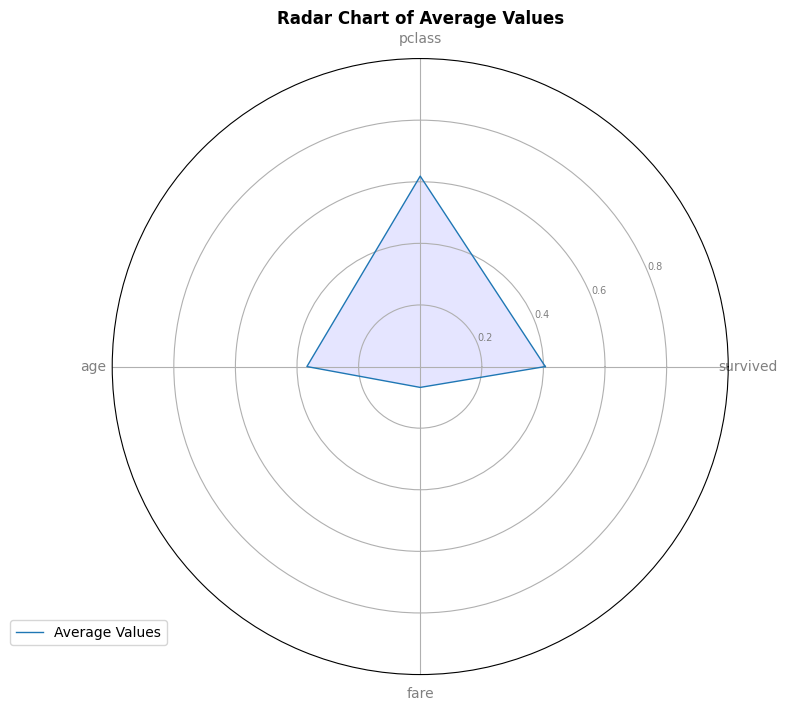

In [101]:
import math
from math import pi

# Select relevant columns for the radar chart
radar_df = titanic_df[['survived', 'pclass', 'age', 'fare']].copy()
radar_df.dropna(inplace=True)

# Normalize the values using MinMaxScaler
scaler = MinMaxScaler()
normalized_values = pd.DataFrame(scaler.fit_transform(radar_df), columns=radar_df.columns)

# Calculate the average values for each column
avg_values = normalized_values.mean()

# Get the column names for the radar chart
variables = list(avg_values.index)

# Calculate the angle for each variable
angles = [n / float(len(variables)) * 2 * pi for n in range(len(variables))]
angles += angles[:1]

# Create the radar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], variables, color='grey', size=10)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
plt.ylim(0, 1)

# Plot the values
values = avg_values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Average Values")
ax.fill(angles, values, 'b', alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Add a title
plt.title('Radar Chart of Average Values', size=12, weight='bold')

# Show the plot
plt.show()


##Data Processing

###Handling Missing Values

In [102]:
# Impute missing values in 'age' column with the mean
titanic_df['age'].fillna(titanic_df['age'].mean(), inplace=True)

# Remove rows with missing values in 'embarked' column
titanic_df.dropna(subset=['embarked'], inplace=True)

###Handling Categorical Variables

In [103]:
# Encode 'sex' variable using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
titanic_df['sex_encoded'] = label_encoder.fit_transform(titanic_df['sex'])

# Perform one-hot encoding on 'embarked' variable
titanic_df = pd.get_dummies(titanic_df, columns=['embarked'])

###Handling Outliers

In [104]:
# Remove outliers in 'fare' column using IQR method
Q1 = titanic_df['fare'].quantile(0.25)
Q3 = titanic_df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
titanic_df = titanic_df[(titanic_df['fare'] > lower_limit) & (titanic_df['fare'] < upper_limit)]


###Data Splitting

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features (X) and target variable (y)
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']

# Perform one-hot encoding on categorical features
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=34)

###Feature Scaling

In [106]:
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

###LogisticRegression

In [107]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = classifier.predict(X_train_scaled)

# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

Training Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       1.00      1.00      1.00       167

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519



###Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred_rf = rf_classifier.predict(X_train_scaled)

# Calculate the accuracy score
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print("Random Forest Training Accuracy:", train_accuracy_rf)

# Generate a classification report
print("Random Forest Classification Report:")
print(classification_report(y_train, y_train_pred_rf))


Random Forest Training Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       1.00      1.00      1.00       167

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519



###Support Vector Machines (SVM) Classifier

In [109]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC()

# Train the model
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred_svm = svm_classifier.predict(X_train_scaled)

# Calculate the accuracy score
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
print("SVM Training Accuracy:", train_accuracy_svm)

# Generate a classification report
print("SVM Classification Report:")
print(classification_report(y_train, y_train_pred_svm))

SVM Training Accuracy: 1.0
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       1.00      1.00      1.00       167

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519



###Gradient Boosting Classifier

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Train the model
gb_classifier.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred_gb = gb_classifier.predict(X_train_scaled)

# Calculate the accuracy score
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
print("Gradient Boosting Training Accuracy:", train_accuracy_gb)

# Generate a classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_train, y_train_pred_gb))

Gradient Boosting Training Accuracy: 1.0
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       1.00      1.00      1.00       167

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519



##Model Evalutaion

In [111]:
# Predict on the testing set
y_test_pred = classifier.predict(X_test_scaled)

# Calculate the accuracy score
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        96

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



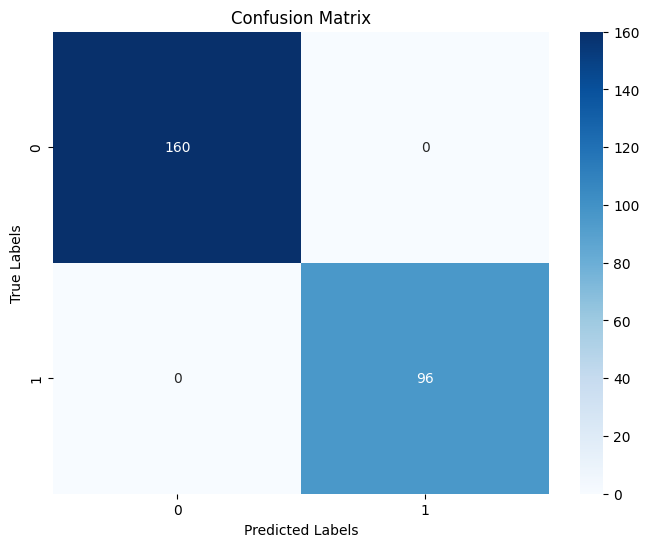

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
# Create a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

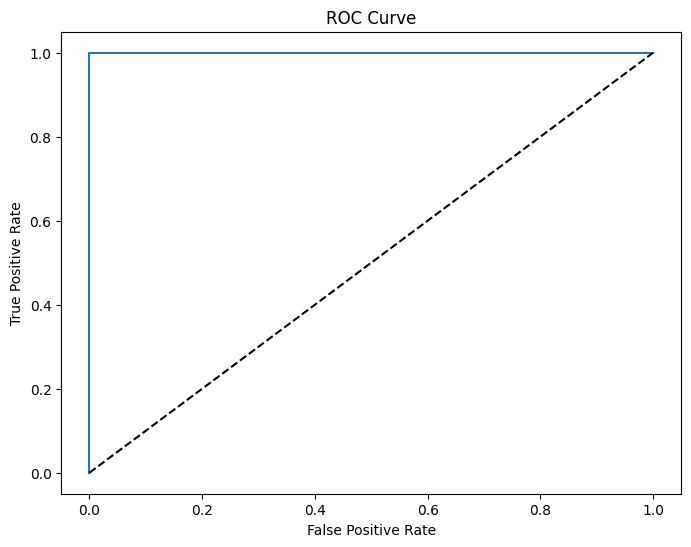

AUC Score: 1.0


In [113]:
# Calculate the probabilities for each class
y_test_prob = classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate the False Positive Rate, True Positive Rate, and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_test_prob)
print("AUC Score:", auc_score)

##Feature Importance

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [115]:
# Split the dataset into features (X) and target variable (y)
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']

# Perform one-hot encoding on categorical features
X = pd.get_dummies(X)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [116]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_scaled, y)

# Get feature importances
importances = rf_classifier.feature_importances_

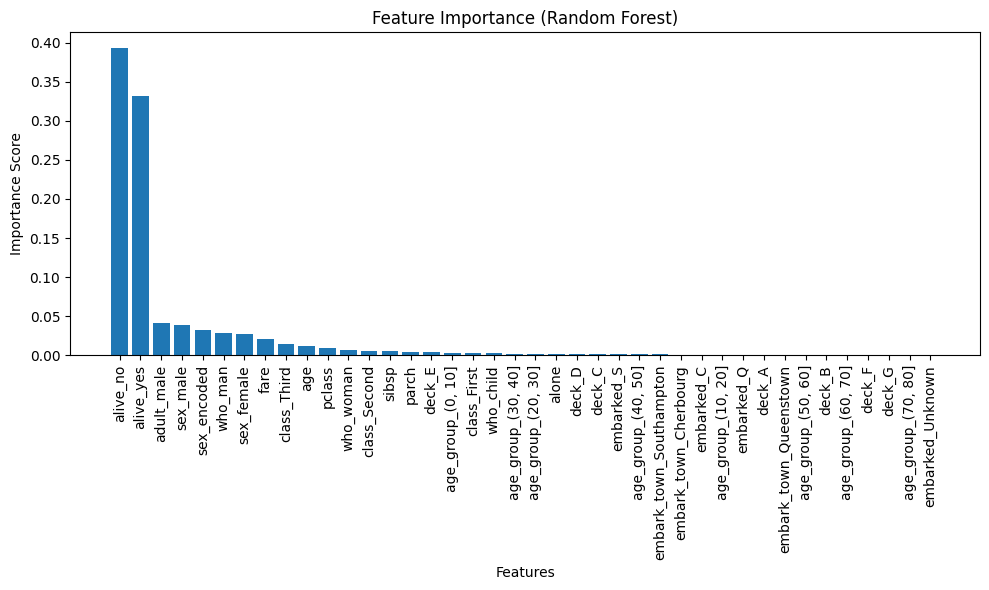

In [117]:
# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = X.columns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [118]:
# Perform permutation importance
perm_importance = permutation_importance(rf_classifier, X_scaled, y, n_repeats=10, random_state=42)
perm_importances = perm_importance.importances_mean

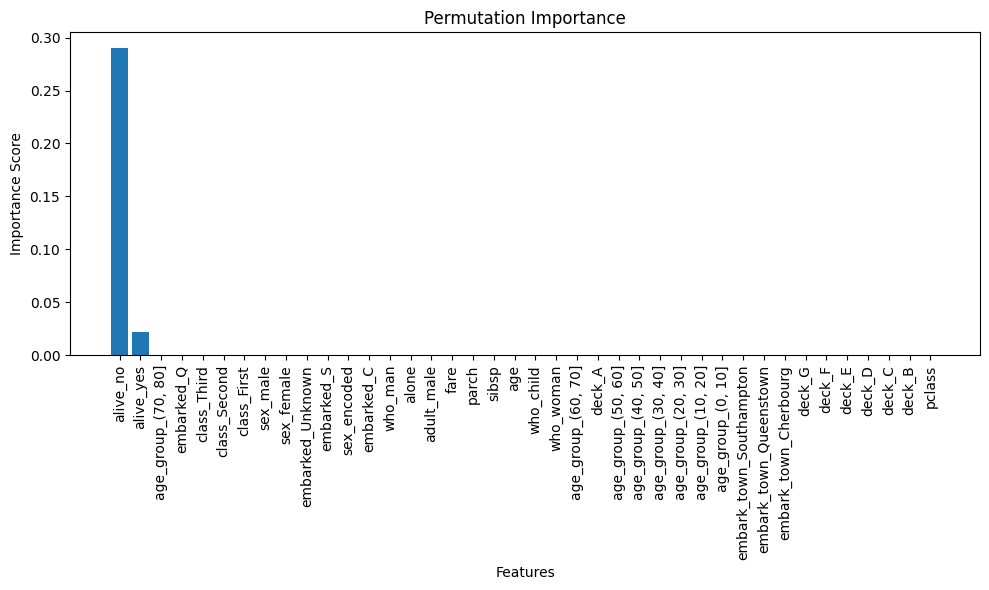

In [119]:
# Sort permutation importances in descending order
sorted_perm_indices = np.argsort(perm_importances)[::-1]

# Create a bar plot of permutation importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(perm_importances)), perm_importances[sorted_perm_indices])
plt.xticks(range(len(perm_importances)), feature_names[sorted_perm_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Permutation Importance')
plt.tight_layout()
plt.show()

In [120]:
# Create a Logistic Regression classifier with L1 regularization
lr_classifier = LogisticRegression(penalty='l1', solver='liblinear')

# Select features based on L1 regularization
l1_selector = SelectFromModel(lr_classifier)
X_l1 = l1_selector.fit_transform(X_scaled, y)
selected_features = np.array(feature_names)[l1_selector.get_support()]